In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [7]:
df=pd.read_csv("Mall_Customers.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df["Gender"]=LabelEncoder().fit_transform(df['Gender'])
df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"},inplace=True)
df.columns=df.columns.str.replace(" ","_").str.strip()

In [9]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
x=df[["Age","Annual_Income","Spending_Score"]]
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x)
df["Cluster"]=kmeans.labels_
df['Cluster'].head()
df.head()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


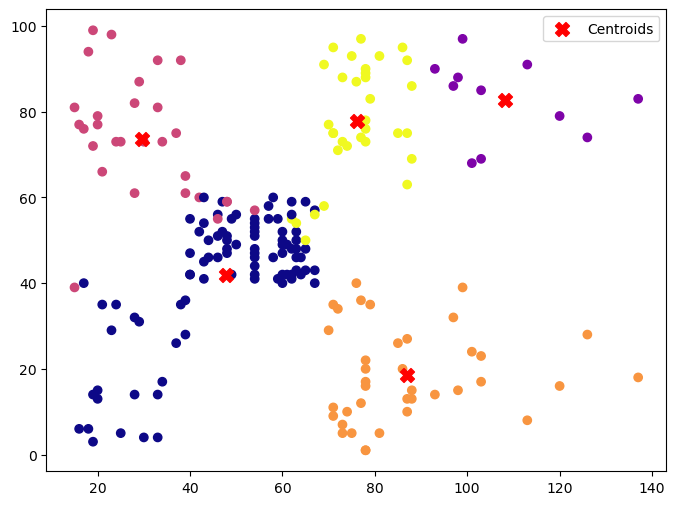

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual_Income"],df["Spending_Score"],c=df["Cluster"],cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=100,c="red",marker="X",label="Centroids")
plt.legend()
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

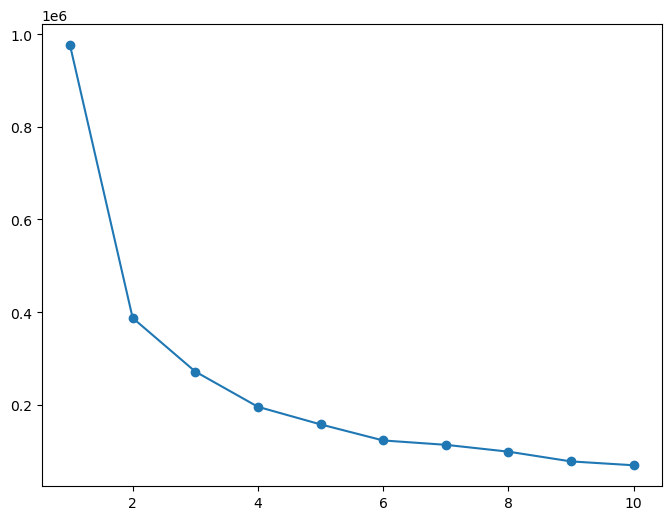

In [12]:
inertia=[]
k_range=range(1,11)
for k in k_range:
    model=KMeans(n_clusters=k,init='k-means++',random_state=42)
    model.fit(df)
    inertia.append(model.inertia_)
plt.figure(figsize=(8,6))
plt.plot(k_range,inertia,marker="o")
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


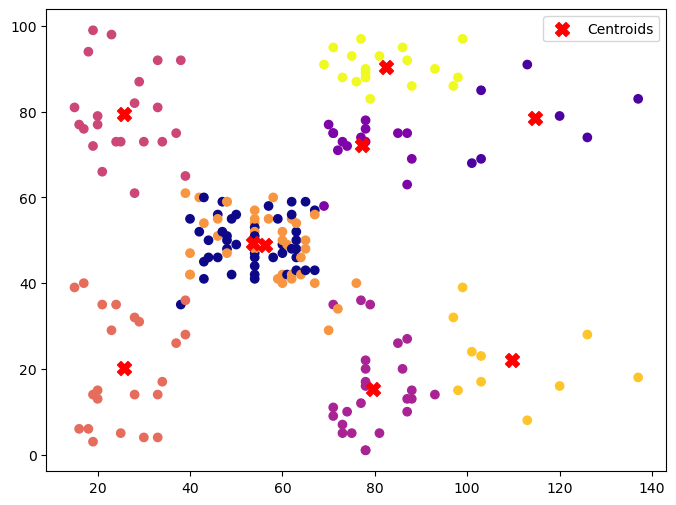

In [13]:
x=df[["Age","Annual_Income","Spending_Score"]]
kmeans=KMeans(n_clusters=9,random_state=42)
kmeans.fit(x)
df["Cluster"]=kmeans.labels_
plt.figure(figsize=(8,6))
plt.scatter(df["Annual_Income"],df["Spending_Score"],c=df["Cluster"],cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=100,c="red",marker="X",label="Centroids")
plt.legend()
plt.show()


In [14]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

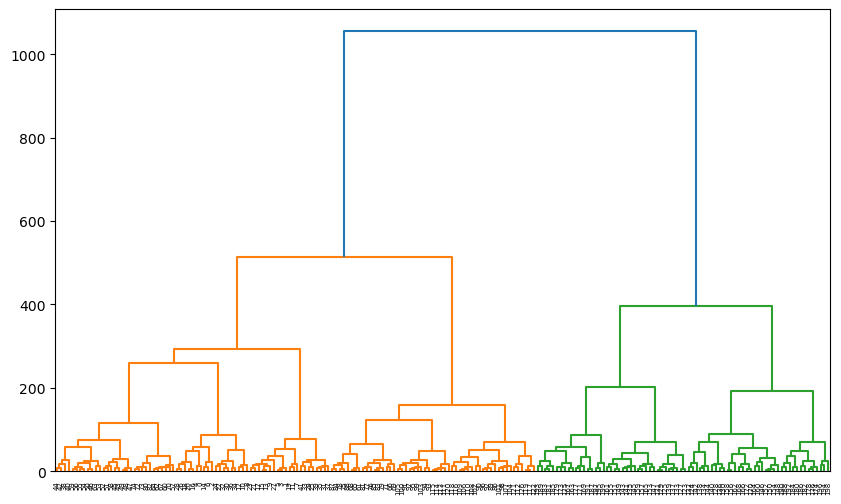

In [15]:
linked=linkage(df,method='ward')
plt.figure(figsize=(10,6))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=False)
plt.show()

In [20]:
aggmodel=AgglomerativeClustering(n_clusters=5,linkage='ward')
df["Cluster2"]=aggmodel.fit_predict(df)

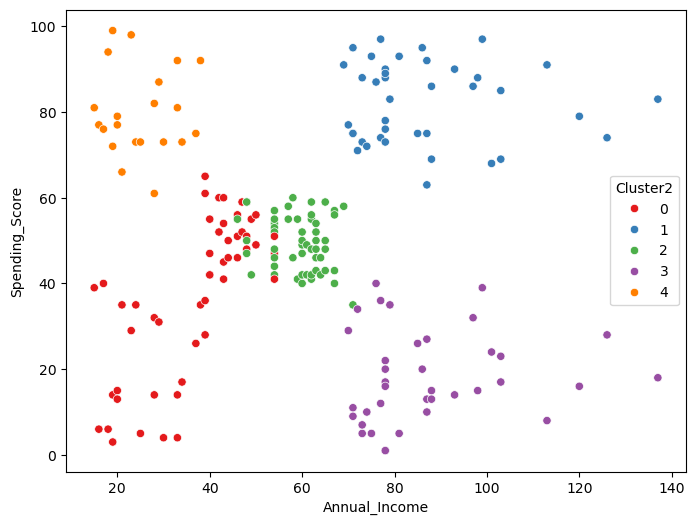

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual_Income",y="Spending_Score",data=df,hue="Cluster2",palette="Set1")
plt.show()

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df2 = df[['Annual_Income', 'Spending_Score']]
scaler=StandardScaler()
x=scaler.fit_transform(df2)
db=DBSCAN(eps=0.5,min_samples=10)
clust=db.fit_predict(x)
df["Cluster3"]=clust
df.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,Cluster2,Cluster3
0,1,1,19,15,39,5,0,-1
1,2,1,21,15,81,4,4,0
2,3,0,20,16,6,5,0,1
3,4,0,23,16,77,4,4,0
4,5,0,31,17,40,5,0,-1
5,6,0,22,17,76,4,4,0
6,7,0,35,18,6,5,0,1
7,8,0,23,18,94,4,4,-1
8,9,1,64,19,3,5,0,1
9,10,0,30,19,72,4,4,0


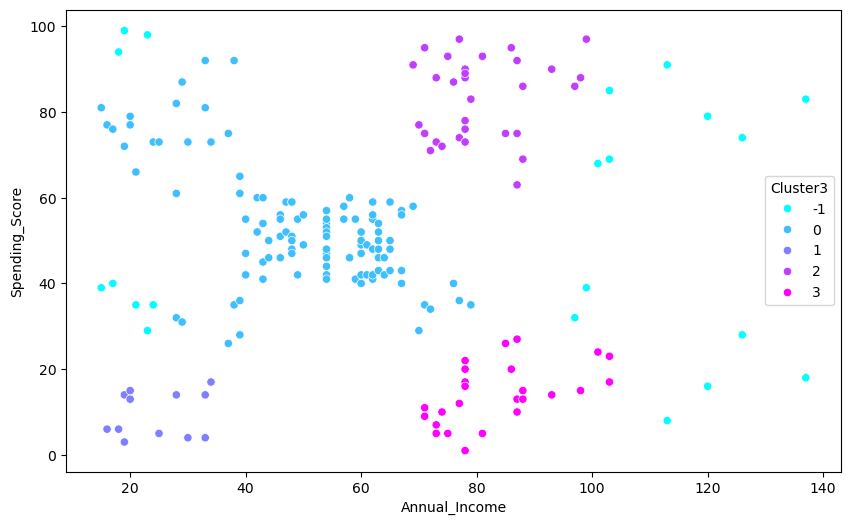

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual_Income",y="Spending_Score",data=df,hue="Cluster3",palette="cool")
plt.show()